<a href="https://colab.research.google.com/github/pavanthakur7/Mini-Project/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install ipython-autotime

In [36]:
#Prepocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/Data Science /minor Project/Datasets'
CATEGORIES = ['ak47','m4a4']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)        

In [11]:
flat_data

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99389542, 0.99389542, 0.99389542, ..., 0.93844444, 0.93844444,
        0.93844444],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.00784314, 0.00784314, 0.00784314, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.34718954, 0.20993464, 0.23738562, ..., 0.0919085 , 0.1036732 ,
        0.12328105]])

In [12]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

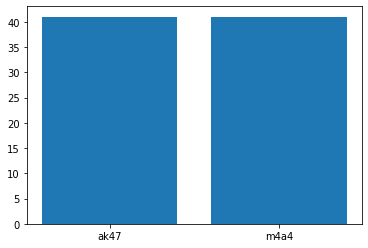

In [13]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [14]:
#Splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [48]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [47]:
# from sklearn.svm import SVC
# model = SVC()
# model.fit(x_train,y_train)
# y_pred = model.predict(x_test)
# y_pred

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
param_grid = {'C':[0.1,1,10,100],
              'kernel':['linear','rbf']}

svc = svm.SVC(probability=True)
grid = GridSearchCV(SVC(),param_grid)
grid.fit(x_train,y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
y_pred = grid.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1])

In [49]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1])

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [57]:
accuracy_score(y_pred,y_test)

0.72

In [52]:
confusion_matrix(y_pred,y_test)

array([[9, 3],
       [4, 9]])

In [58]:
import pickle
pickle.dump(grid,open('img_model.p','wb'))

In [59]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://cdn.britannica.com/70/123170-050-D7AAF458/AK-47.jpg
(1600, 1599, 3)
 PREDICTED OUTPUT: ak47


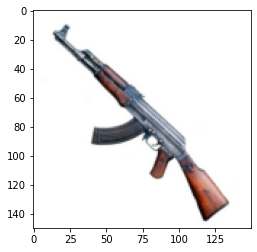

In [61]:
#Testing
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')